In [1]:
%load_ext autoreload
%autoreload 2

In [108]:
from seizure_sequence import SeizureSequence
from preprocessor import PreProcessor
import os

cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb" in x]
p = PreProcessor(wavelet="db4")
seizure_sequence = SeizureSequence(1, "ml_processed_balanced", cases, bias_positive=False, preprocessor=p)
data, labels = seizure_sequence.__getitem__(0)
print(data.shape, labels.shape)
for features in data[0]:
    print(features[0], features[1], features[2], features[3], features[4], features[5], features[6])#, features[7])
# for i in range(0, len(seizure_sequence)):
#     data, labels = seizure_sequence.__getitem__(i)
#     print(data.shape)

data coming in (80, 23, 38)
finished features
feature shape then max of first: (7, 80, 23) -2.182799005058505e-05
finished features reshape (80, 23, 7) -0.00014163983161514485
result_shape (80, 23, 7)
----
(80, 23, 7) (80, 1)
-0.00022214448493520692 -0.0002441454287267839 -0.00014163983161514485 -0.000166191062209533 -0.0001345933548961501 -0.0003064013400011971 -0.0001622113011196362
-0.00019242601310504308 -0.00022724087664540424 -0.0003142435873337839 -0.0001316169969800824 -0.00020595425144648993 -0.00020802382895108724 -0.00022622311449463305
-0.00013413484243206752 -0.0002505423745461363 -0.0002924052566772328 -0.00019453632635228104 -0.00017641520138879954 -0.0001574712778466994 -0.00010584154084475168
-4.1405151895909276e-05 -0.00013413484243206752 -7.434046732612361e-05 -7.937161540994919e-05 -0.0001285635989447633 -0.0001225682134083215 -0.00015457093953943457
-0.00017827820397555178 -0.00010213584531723855 -0.00011146708739826103 -0.0002471406918173657 -0.0002657557963608544

In [115]:
from model import create_recurrent_model, compile_model

model = compile_model(create_recurrent_model())
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 23, 256)           270336    
                                                                 
 lstm_22 (LSTM)              (None, 23, 512)           1574912   
                                                                 
 lstm_23 (LSTM)              (None, 256)               787456    
                                                                 
 dense_27 (Dense)            (None, 128)               32896     
                                                                 
 dense_28 (Dense)            (None, 1)                 129       
                                                                 
Total params: 2,665,729
Trainable params: 2,665,729
Non-trainable params: 0
_________________________________________________________________


100 epochs, ~60% accurate, ~0.63 loss
200 epochs, ~63%, ~0.63

full 256Hz set, 3 levels of decomp:

.6, 65% using detail
.36, 84% using approx - lines up with what i've read, that most important info for seizure is between 0.5 and 30Hz

In [116]:
history = model.fit(seizure_sequence, epochs=200)

Epoch 1/200
184/184 [==============================] - 7s 22ms/step - loss: 0.6094 - accuracy: 0.6223
Epoch 2/200
184/184 [==============================] - 4s 22ms/step - loss: 0.5804 - accuracy: 0.6450
Epoch 3/200
184/184 [==============================] - 4s 22ms/step - loss: 0.5798 - accuracy: 0.6451
Epoch 4/200
184/184 [==============================] - 4s 23ms/step - loss: 0.5796 - accuracy: 0.6444
Epoch 5/200
184/184 [==============================] - 4s 22ms/step - loss: 0.5793 - accuracy: 0.6429
Epoch 6/200
184/184 [==============================] - 4s 22ms/step - loss: 0.5888 - accuracy: 0.6447
Epoch 7/200
184/184 [==============================] - 4s 22ms/step - loss: 0.5799 - accuracy: 0.6456
Epoch 8/200
184/184 [==============================] - 4s 23ms/step - loss: 0.6111 - accuracy: 0.6366
Epoch 9/200
184/184 [==============================] - 4s 23ms/step - loss: 0.5815 - accuracy: 0.6455
Epoch 10/200
184/184 [==============================] - 4s 23ms/step - loss: 0.586

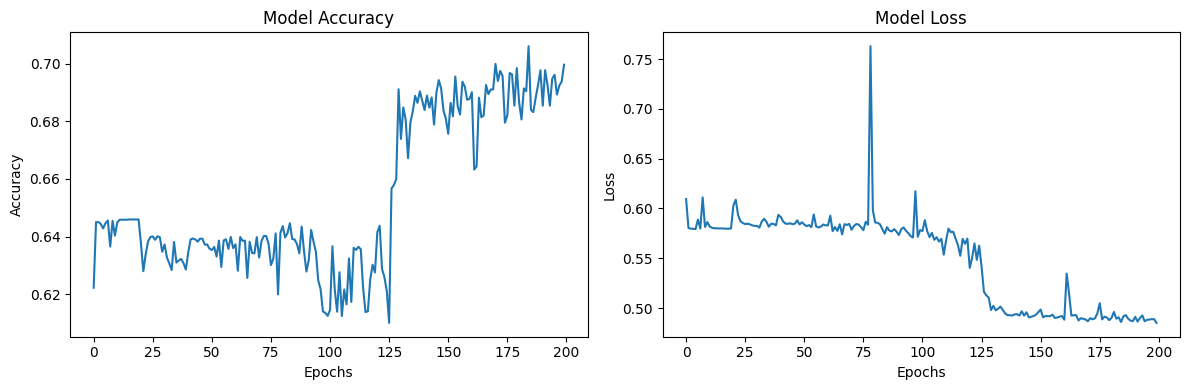

In [117]:
from model import accuracy_loss_plot
accuracy_loss_plot(history)